In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the required libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("seaborn",sns.__version__)
print("sklearn",sklearn.__version__)

pandas 2.2.2
numpy 1.26.4
seaborn 0.13.2
sklearn 1.5.2


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/laptop_prices.csv')
df1.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# EDA

In [5]:
df1.shape

(1275, 22)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Inches                1275 non-null   float64
 3   Ram                   1275 non-null   int64  
 4   OS                    1275 non-null   object 
 5   Weight                1275 non-null   float64
 6   Price_euros           1271 non-null   float64
 7   Screen                1275 non-null   object 
 8   ScreenW               1275 non-null   int64  
 9   ScreenH               1275 non-null   int64  
 10  Touchscreen           1275 non-null   object 
 11  IPSpanel              1275 non-null   object 
 12  RetinaDisplay         1273 non-null   object 
 13  CPU_company           1275 non-null   object 
 14  CPU_freq              1274 non-null   float64
 15  CPU_model            

# Removing null values

In [7]:
df1.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,4
Screen,0
ScreenW,0
ScreenH,0


In [8]:
df1.dropna(subset=['Price_euros'],inplace=True)
df1.dropna(subset=['RetinaDisplay'], inplace=True)
df1.dropna(subset=['CPU_freq'],inplace=True)

In [9]:
df1.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# Changing price from Euros to Dollars

In [10]:
df1['Price'] =  df1['Price_euros'] * 1.10
df1.drop('Price_euros',axis=1,inplace=True)
df1.head()

,Company,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price
0,Apple,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,No,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1473.659
1,Apple,Ultrabook,13.3,8,macOS,1.34,Standard,1440,900,No,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,988.834
2,HP,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,No,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,632.500
3,Apple,Ultrabook,15.4,16,macOS,1.83,Standard,2880,1800,No,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2791.195
4,Apple,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,No,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1983.960


# Data Cleaning and Feature Engineering

In [11]:
def cmpny(x):
  if x == 'Chuwi' or x == 'Mediacom' or x == 'Vero' or x == 'Fujitsu':
    return 'Other'
  else:
    return x

In [12]:
df1['Company'] = df1['Company'].apply(cmpny)
df1.head()

,Company,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price
0,Apple,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,No,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1473.659
1,Apple,Ultrabook,13.3,8,macOS,1.34,Standard,1440,900,No,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,988.834
2,HP,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,No,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,632.500
3,Apple,Ultrabook,15.4,16,macOS,1.83,Standard,2880,1800,No,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2791.195
4,Apple,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,No,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1983.960


In [13]:
df1['Company'].value_counts()

,count
Company,
Dell,290
Lenovo,288
HP,268
Asus,151
Acer,99
MSI,54
Toshiba,47
Apple,21
Other,17


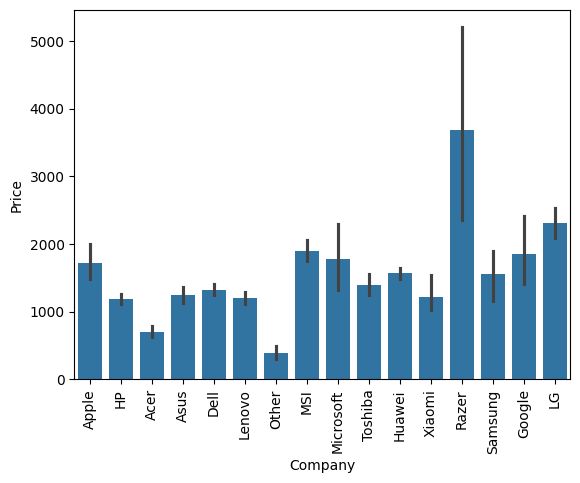

In [14]:
sns.barplot(x='Company',y='Price',data=df1)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

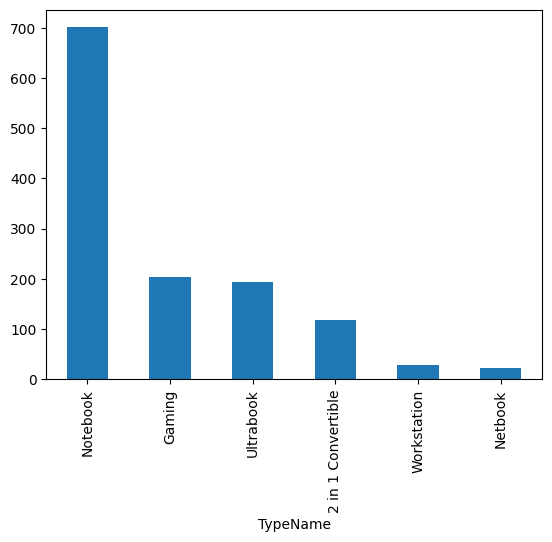

In [15]:
df1['TypeName'].value_counts().plot(kind='bar')

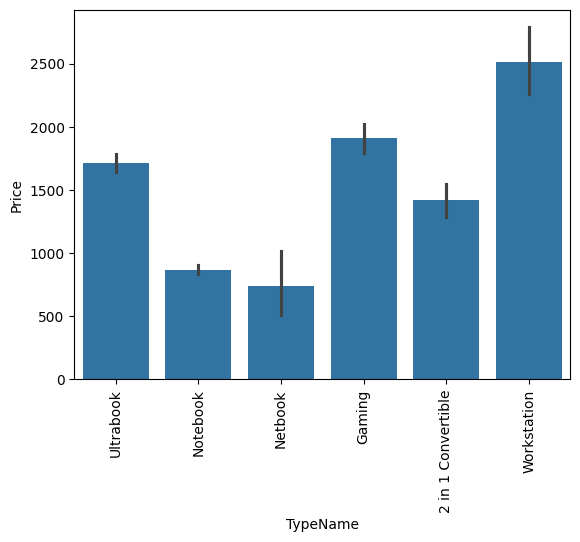

In [16]:
sns.barplot(x='TypeName',y='Price',data=df1)
plt.xticks(rotation=90)
plt.show()

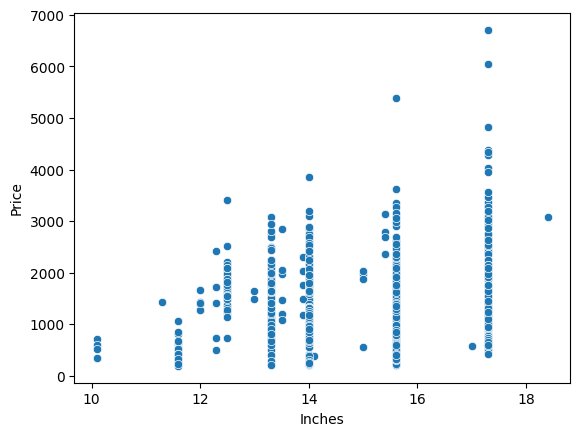

In [17]:
sns.scatterplot(x='Inches',y='Price',data=df1)
plt.show()

In [18]:
df1.drop('Weight',axis=True,inplace=True)
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price
0,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1473.659
1,Apple,Ultrabook,13.3,8,macOS,Standard,1440,900,No,No,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,988.834
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,No,No,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,632.500
3,Apple,Ultrabook,15.4,16,macOS,Standard,2880,1800,No,Yes,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2791.195
4,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1983.960


In [19]:
df1['CPU_company'].value_counts()

,count
CPU_company,
Intel,1207
AMD,60
Samsung,1


In [20]:
df1 = df1[df1['CPU_company'] != 'Samsung']
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price
0,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1473.659
1,Apple,Ultrabook,13.3,8,macOS,Standard,1440,900,No,No,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,988.834
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,No,No,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,632.500
3,Apple,Ultrabook,15.4,16,macOS,Standard,2880,1800,No,Yes,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2791.195
4,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1983.960


In [21]:
df1['CPU_company'].value_counts()

,count
CPU_company,
Intel,1207
AMD,60


In [22]:
df1.CPU_model.value_counts()

,count
CPU_model,
Core i5 7200U,192
Core i7 7700HQ,146
Core i7 7500U,132
Core i3 6006U,80
Core i7 8550U,73
...,...
Core i5 7500U,1
E-Series E2-6110,1
Core i5 6440HQ,1


In [23]:
df1.CPU_model.unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

In [24]:
def Core_model(x):
  if x.split()[1] == "i5" or x.split()[1] == "i7" or x.split()[1] == "i3" :
    return x.split()[1]
  elif x[0] == "A":
    return "AMD"
  elif x.split()[0] == "Core" or x.split()[0] == "Xeon" or x.split()[0] == "Celeron" or x.split()[0] == "Pentium" or x.split()[0] == "Atom":
    return "Older Intel"
  else:
    return "AMD"

In [25]:
df1['CPU_model'] = df1['CPU_model'].apply(Core_model)
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price
0,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,...,Intel,2.3,i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1473.659
1,Apple,Ultrabook,13.3,8,macOS,Standard,1440,900,No,No,...,Intel,1.8,i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,988.834
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,No,No,...,Intel,2.5,i5,256,0,SSD,No,Intel,HD Graphics 620,632.500
3,Apple,Ultrabook,15.4,16,macOS,Standard,2880,1800,No,Yes,...,Intel,2.7,i7,512,0,SSD,No,AMD,Radeon Pro 455,2791.195
4,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,...,Intel,3.1,i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1983.960


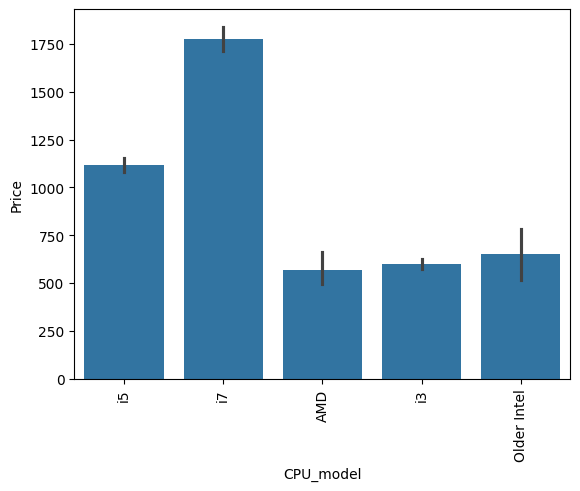

In [26]:
sns.barplot(x='CPU_model',y='Price',data=df1)
plt.xticks(rotation=90)
plt.show()

In [27]:
df1.drop('CPU_company',axis=1,inplace=True)
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price
0,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,Yes,2.3,i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1473.659
1,Apple,Ultrabook,13.3,8,macOS,Standard,1440,900,No,No,No,1.8,i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,988.834
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,No,No,No,2.5,i5,256,0,SSD,No,Intel,HD Graphics 620,632.500
3,Apple,Ultrabook,15.4,16,macOS,Standard,2880,1800,No,Yes,Yes,2.7,i7,512,0,SSD,No,AMD,Radeon Pro 455,2791.195
4,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,Yes,3.1,i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1983.960


<Axes: xlabel='GPU_company'>

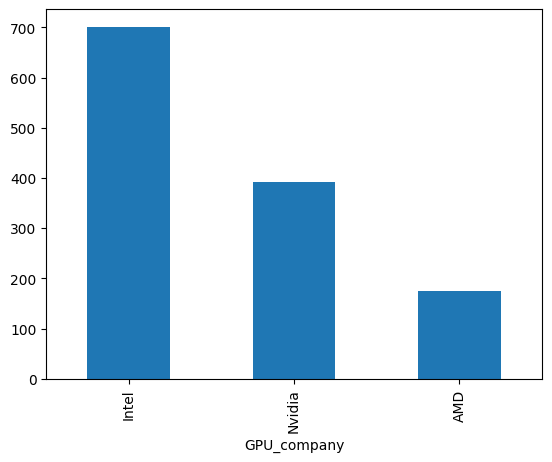

In [28]:
df1.GPU_company.value_counts().plot(kind='bar')

In [29]:
df1.GPU_model.unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce 930MX ', 'GeForce GTX 1060', 'GeForce 150MX',
       'Iris Graphics 540', 'Radeon RX 580', 'GeForce 920MX',
       'Radeon R4 Graphics', 'Radeon 520', 'GeForce GTX 1070',
       'GeForce GTX 1050 Ti', 'R4 Graphics', 'GeForce GTX 940MX',
       'Radeon RX 560', 'GeForce 920M', 'Radeon R7 M445', 'GeForce MX130',
       'Radeon RX 550', 'GeForce GTX 1050M', 'HD Graphics 515',
       'Radeon R5 M420', 'HD Graphics 505', 'GTX 980 SLI', 'R17M-M1-70',
       'GeForce GTX 1080', 'Quadro M1200', 'GeForce 920MX ',
       'GeForce GTX

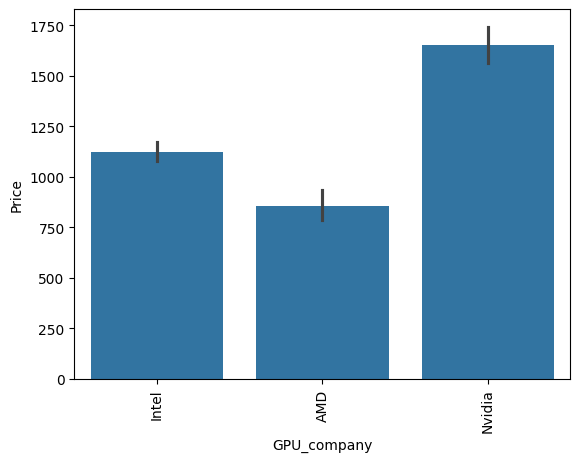

In [30]:
sns.barplot(x='GPU_company',y='Price',data=df1)
plt.xticks(rotation=90)
plt.show()

In [31]:
df1.drop('GPU_model',axis=1,inplace=True)
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,Yes,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,macOS,Standard,1440,900,No,No,No,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,No,No,No,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,macOS,Standard,2880,1800,No,Yes,Yes,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,Yes,3.1,i5,256,0,SSD,No,Intel,1983.960


In [32]:
df1 = df1[df1['Touchscreen'] != 'No+J722' ]
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,Yes,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,macOS,Standard,1440,900,No,No,No,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,No OS,Full HD,1920,1080,No,No,No,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,macOS,Standard,2880,1800,No,Yes,Yes,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,macOS,Standard,2560,1600,No,Yes,Yes,3.1,i5,256,0,SSD,No,Intel,1983.960


In [33]:
df1.PrimaryStorage.value_counts()

,count
PrimaryStorage,
256,505
1024,236
128,175
512,135
500,124
32,41
2048,16
64,15
16,10


In [34]:
df1.PrimaryStorageType.value_counts()

,count
PrimaryStorageType,
SSD,833
HDD,355
Flash Storage,70
Hybrid,8


In [35]:
df1.OS.value_counts()

,count
OS,
Windows 10,1042
No OS,65
Linux,57
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [36]:
def OS(x):
  if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
    return 'Windows'
  elif x == 'Mac OS X' or x == 'macOS':
    return 'Mac'
  else:
    return 'Google/No OS/Linux'

In [37]:
df1['OS'] = df1['OS'].apply(OS)
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,No,Yes,Yes,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,Mac,Standard,1440,900,No,No,No,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,Google/No OS/Linux,Full HD,1920,1080,No,No,No,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,Mac,Standard,2880,1800,No,Yes,Yes,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,No,Yes,Yes,3.1,i5,256,0,SSD,No,Intel,1983.960


In [38]:
df1.OS.value_counts()

,count
OS,
Windows,1095
Google/No OS/Linux,150
Mac,21


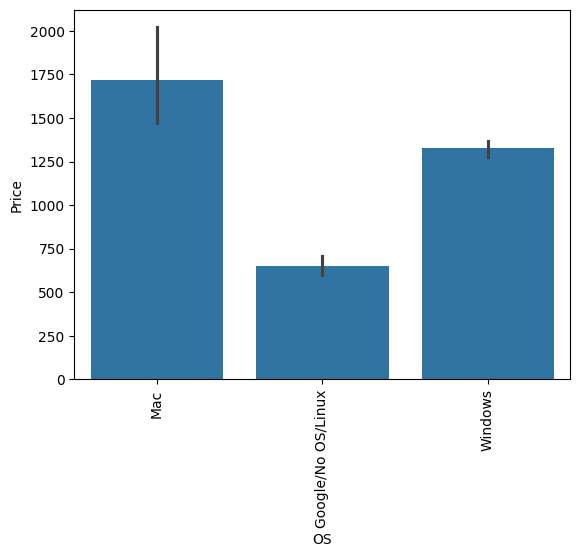

In [39]:
sns.barplot(x='OS',y='Price',data=df1)
plt.xticks(rotation=90)
plt.show()

In [40]:
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,No,Yes,Yes,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,Mac,Standard,1440,900,No,No,No,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,Google/No OS/Linux,Full HD,1920,1080,No,No,No,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,Mac,Standard,2880,1800,No,Yes,Yes,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,No,Yes,Yes,3.1,i5,256,0,SSD,No,Intel,1983.960


In [41]:
df1.shape

(1266, 19)

In [42]:
columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']
df1[columns] = df1[columns].replace({'Yes': 1, 'No': 0})
df1.head()

<ipython-input-42-993674b2dd51>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[columns] = df1[columns].replace({'Yes': 1, 'No': 0})


,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,0,1,1,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,Mac,Standard,1440,900,0,0,0,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,Google/No OS/Linux,Full HD,1920,1080,0,0,0,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,Mac,Standard,2880,1800,0,1,1,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,0,1,1,3.1,i5,256,0,SSD,No,Intel,1983.960


In [43]:
df1.corr(numeric_only=True)['Price']

,Price
Inches,0.067008
Ram,0.741023
ScreenW,0.553164
ScreenH,0.073346
Touchscreen,0.191755
IPSpanel,0.251900
RetinaDisplay,0.086523
CPU_freq,0.430447
PrimaryStorage,-0.125012
SecondaryStorage,0.290755


<Axes: >

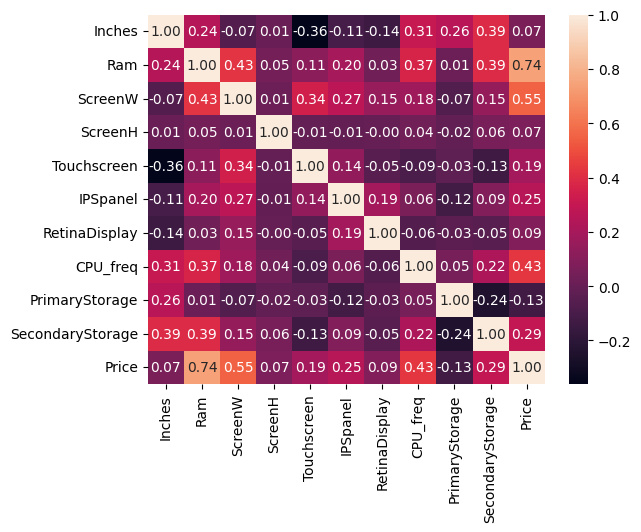

In [44]:
sns.heatmap(df1.corr(numeric_only=True),annot=True,fmt='.2f')

In [45]:
df1.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Screen', 'ScreenW',
       'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_freq',
       'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'Price'],
      dtype='object')

In [46]:
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,0,1,1,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,Mac,Standard,1440,900,0,0,0,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,Google/No OS/Linux,Full HD,1920,1080,0,0,0,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,Mac,Standard,2880,1800,0,1,1,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,Mac,Standard,2560,1600,0,1,1,3.1,i5,256,0,SSD,No,Intel,1983.960


In [47]:
df1.drop(['ScreenW','ScreenH'],axis=1,inplace=True)
df1.head()

,Company,TypeName,Inches,Ram,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price
0,Apple,Ultrabook,13.3,8,Mac,Standard,0,1,1,2.3,i5,128,0,SSD,No,Intel,1473.659
1,Apple,Ultrabook,13.3,8,Mac,Standard,0,0,0,1.8,i5,128,0,Flash Storage,No,Intel,988.834
2,HP,Notebook,15.6,8,Google/No OS/Linux,Full HD,0,0,0,2.5,i5,256,0,SSD,No,Intel,632.500
3,Apple,Ultrabook,15.4,16,Mac,Standard,0,1,1,2.7,i7,512,0,SSD,No,AMD,2791.195
4,Apple,Ultrabook,13.3,8,Mac,Standard,0,1,1,3.1,i5,256,0,SSD,No,Intel,1983.960


# Model building

In [48]:
x = df1.drop(columns=['Price'])
y = df1['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Squared Error (MSE):", lr_mse)

lr_r2_score = r2_score(y_test, y_pred)
print("R2 Score:", lr_r2_score)

Mean Absolute Error (MAE): 249.11337539021903
Mean Squared Error (MSE): 114680.9429551072
R2 Score: 0.7365134502910935


# Ridge Regression

In [51]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [52]:
from sklearn.linear_model import RidgeCV,Ridge
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

ridgecv = RidgeCV(alphas=alphas,scoring='neg_mean_squared_error')

pipe = Pipeline([
    ('step1',step1),
    ('step2',ridgecv)
])
pipe.fit(x_train,y_train)

ridgecv.alpha_

1.328043891473342

In [53]:
ridge4 = Ridge(alpha=ridgecv.alpha_)

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

rr_pipe = Pipeline([
    ('step1',step1),
    ('step2',ridge4)
])

rr_pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", ridge_mae)
print("Mean Squared Error (MSE):", ridge_mse)

ridge_r2_score = r2_score(y_test, y_pred)
print("R2 Score:", ridge_r2_score)

Mean Absolute Error (MAE): 247.42323490898602
Mean Squared Error (MSE): 109346.94534718376
R2 Score: 0.7487686392497113


# Lasso Regression

In [54]:
from sklearn.linear_model import LassoCV,Lasso
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

lasso_cv = LassoCV(alphas=alphas,max_iter=100000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',lasso_cv)
])
pipe.fit(x_train,y_train)

lasso_cv.alpha_

0.7599555414764666

In [55]:
lasso4 = Lasso(alpha=lasso_cv.alpha_)

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

pipe = Pipeline([
    ('step1',step1),
    ('step2',lasso4)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", lasso_mae)
print("Mean Squared Error (MSE):", lasso_mse)

lasso_r2_score = r2_score(y_test, y_pred)
print("R2 Score:", lasso_r2_score)

Mean Absolute Error (MAE): 248.5908083229711
Mean Squared Error (MSE): 112994.24053250636
R2 Score: 0.7403887532862103


# Descion Tree

In [56]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')
dt_reg = DecisionTreeRegressor(criterion='squared_error')

pipe = Pipeline([
    ('step1',step1),
    ('step2',dt_reg)
])
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)

dt_r2_score = r2_score(y_test, y_pred)
print("R2 Score:", dt_r2_score)

Mean Absolute Error (MAE): 245.80174095425573
Mean Squared Error (MSE): 151635.8357467575
R2 Score: 0.6516073015829673


# Pruning

In [57]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

dt_reg = DecisionTreeRegressor(criterion='squared_error')
pipe = Pipeline([
    ('step1',step1),
    ('step2',dt_reg)
])

pipe.fit(x_train,y_train)

# Apply the preprocessing steps to x_train before passing it to cost_complexity_pruning_path
x_train_transformed = pipe[:-1].transform(x_train) #This line ensures that the preprocessing steps are applied to x_train

subtress = dt_reg.cost_complexity_pruning_path(x_train_transformed, y_train) #Pass the transformed data instead of the original data
cpp_alphas, impurities = subtress.ccp_alphas, subtress.impurities
print(cpp_alphas)

[0.00000000e+00 5.75174515e-14 5.97825463e-08 5.97826092e-06
 5.97826268e-06 5.97826087e-04 5.97826087e-04 5.97826088e-04
 6.31384057e-04 7.97101449e-04 7.97101449e-04 1.87292935e-03
 2.39130435e-03 2.39130435e-03 4.39049457e-03 4.68745471e-03
 5.38043478e-03 5.74510870e-03 7.17391304e-03 9.56521739e-03
 9.56521739e-03 9.61310326e-03 1.26500000e-02 1.29264946e-02
 1.49456522e-02 1.49456522e-02 1.49456522e-02 1.49456522e-02
 1.99275362e-02 2.08103261e-02 2.15217391e-02 2.15935380e-02
 2.52581522e-02 2.92934783e-02 3.36775362e-02 3.90579710e-02
 4.37025815e-02 4.48369565e-02 4.84239130e-02 4.84239130e-02
 5.22978261e-02 5.32707880e-02 5.89536232e-02 5.97826087e-02
 5.97826087e-02 5.97826087e-02 5.97826087e-02 5.97826087e-02
 5.97826087e-02 6.45652174e-02 6.59354547e-02 7.14176514e-02
 7.26358696e-02 7.97101449e-02 7.97101449e-02 7.97898750e-02
 8.96739130e-02 8.96739130e-02 9.64492754e-02 1.05416667e-01
 1.30064538e-01 1.30326087e-01 1.34331582e-01 1.34510870e-01
 1.49695748e-01 1.530434

In [58]:
train_acc_list = []
test_acc_list = []

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')

for cpp_alpha in cpp_alphas:
    dt = DecisionTreeRegressor(ccp_alpha= cpp_alpha)
    pipe = Pipeline([
        ('step1',step1),
        ('step2',dt)
    ])
    pipe.fit(x_train, y_train)
    train_pred = pipe.predict(x_train)
    test_pred = pipe.predict(x_test)
    train_acc_list.append(pipe.score(x_train,y_train))
    test_acc_list.append(pipe.score(x_test,y_test))

In [59]:
test_acc_list.index(max(test_acc_list))

673

In [60]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,5,10,13,14,15])
],remainder='passthrough')
best_dt = DecisionTreeRegressor(ccp_alpha=cpp_alphas[test_acc_list.index(max(test_acc_list))])
pipe = Pipeline([
    ('step1',step1),
    ('step2',best_dt)
])

pipe.fit(x_train,y_train)

best_dt_y_pred = pipe.predict(x_test)

best_dt_mae = mean_absolute_error(y_test, best_dt_y_pred)
best_dt_mse = mean_squared_error(y_test, best_dt_y_pred)

print("Mean Absolute Error (MAE):", best_dt_mae)
print("Mean Squared Error (MSE):", best_dt_mse)

best_dt_r2_score = r2_score(y_test, best_dt_y_pred)
print("R2 Score:", best_dt_r2_score)

Mean Absolute Error (MAE): 240.95584002618818
Mean Squared Error (MSE): 110781.29944973196
R2 Score: 0.7454731221062119


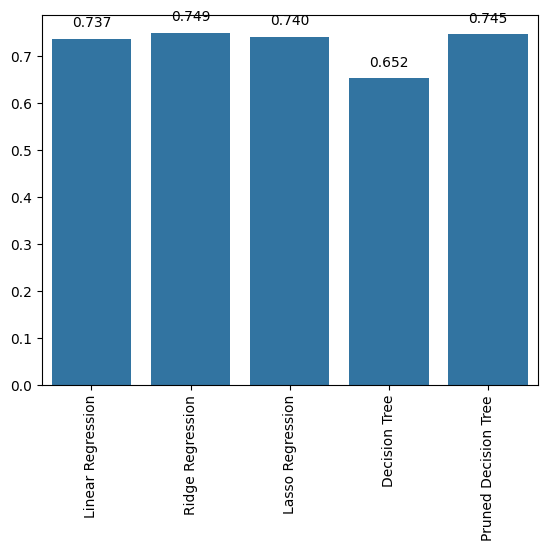

In [61]:
r2 = [lr_r2_score,ridge_r2_score,lasso_r2_score,dt_r2_score,best_dt_r2_score]

ax = sns.barplot(x=['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree','Pruned Decision Tree'],y=r2)

for index,value in enumerate(r2) :
      ax.text(index, value + 0.02, f'{value:.3f}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

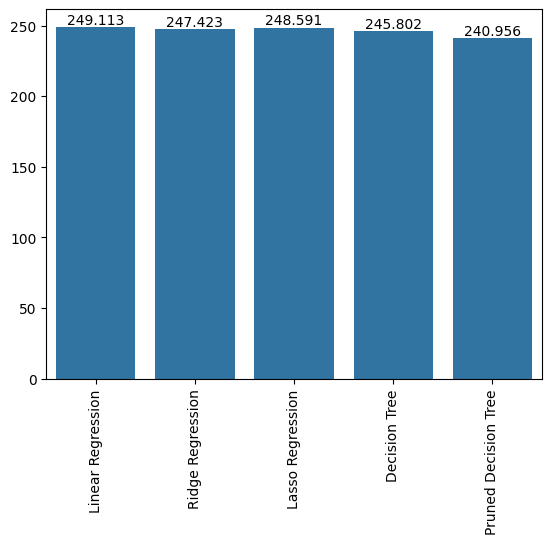

In [62]:
mae = [lr_mae,ridge_mae,lasso_mae,dt_mae,best_dt_mae]

ax = sns.barplot(x=['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree','Pruned Decision Tree'],y=mae)

for index,value in enumerate(mae) :
      ax.text(index, value + 0.02, f'{value:.3f}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

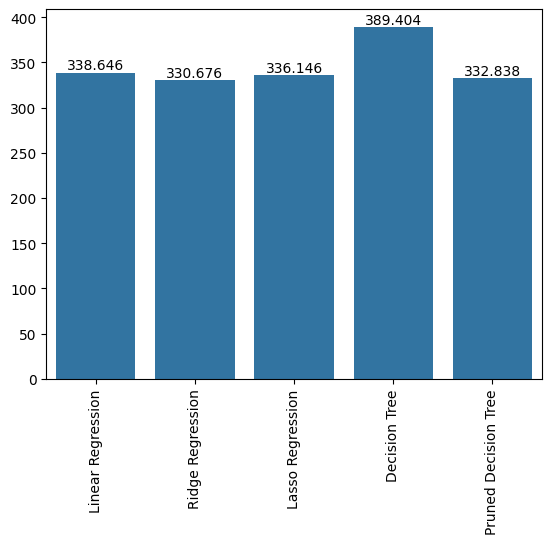

In [63]:
mse = [lr_mse**0.5,ridge_mse**0.5,lasso_mse**0.5,dt_mse**0.5,best_dt_mse**0.5]

ax = sns.barplot(x=['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree','Pruned Decision Tree'],y=mse)

for index,value in enumerate(mse) :
      ax.text(index, value + 0.02, f'{value:.3f}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [64]:
import joblib

file_name = 'laptop_reg.sav'
joblib.dump(rr_pipe,file_name)

['laptop_reg.sav']